In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# station_list_with_entry_exit_count
slist = pd.read_csv("/content/drive/My Drive/Data Links/stations_entry_exit.csv")
slist_df = pd.DataFrame(slist)

In [ ]:
slist.head()

,Unnamed: 0,STATION_ID,NAME,lat,lon,ENTRY_COUNT,EXIT_COUNT
0,0,MSTN_001,Anacostia,38.862971,-76.995373,150542,154504
1,1,MSTN_002,Archives-Navy Meml,38.893673,-77.021917,210151,206475
2,2,MSTN_003,Benning Road,38.890983,-76.938367,58776,52299
3,3,MSTN_004,Brookland-CUA,38.933219,-76.994537,138135,136010
4,4,MSTN_005,Capitol South,38.885070,-77.005142,159656,173799


In [ ]:
# DBSCAN
import matplotlib.pyplot as plt
from sklearn import cluster
# from geopy.distance import great_circle
# from shapely.geometry import Point

coords = slist_df.loc[:,["lat","lon"]]
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = cluster.DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
range_cluster_labels = np.unique(cluster_labels)
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range_cluster_labels])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 8


In [ ]:
from typing import Tuple
def get_centermost_point(cluster):
    lat_mean, lon_mean = cluster.mean()
    centroid = []
    centroid.append(lat_mean)
    centroid.append(lon_mean)
    return tuple(centroid)

centermost_points = clusters.map(get_centermost_point)

# Print centroids
centermost_points

0     (38.93777955209302, -77.03553383069767)
1     (38.89813129423077, -77.01978419576922)
2    (38.934378896666665, -77.05781787666666)
3    (38.899456253333334, -76.94012539333333)
4             (38.8856151275, -77.0996701775)
5              (38.860674225, -77.0518989725)
6               (38.8037755375, -77.06514204)
7           (38.92378360250001, -77.22680997)
dtype: object

In [ ]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

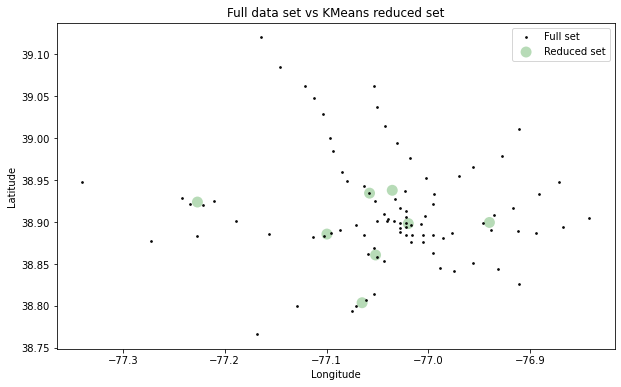

In [ ]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rep_points['lon'], rep_points['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(slist_df['lon'], slist_df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs KMeans reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [ ]:
# Check if geopandas is installed
import sys
'geopandas' in sys.modules
# False == not installed

True

In [ ]:
# pip install geopandas

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame

title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
backgroundcolor = '#e4f4ff'

axis_bgcolor = '#f0f0f0'

In [ ]:
# load the shapefile of all countries in the world
all_countries = GeoDataFrame.from_file('/content/drive/My Drive/Data Links/World_Countries_(Generalized)/World_Countries__Generalized_.shp')

In [ ]:
# define the coordinates at the extent of our point data for our map
margin_width = 2
lon_range = [rep_points['lon'].min() - margin_width, rep_points['lon'].max() + margin_width]
lat_range = [rep_points['lat'].min() - margin_width, rep_points['lat'].max() + margin_width]
 
# create a rectangle from these coordinates
spatial_extent = Polygon([(lon_range[0], lat_range[0]),
    (lon_range[0], lat_range[1]),
    (lon_range[1], lat_range[1]),
    (lon_range[1], lat_range[0])])

In [ ]:
# get the shapes with geopandas intersects, which pulls the full shape, but let's remove russia because it's too big
countries = all_countries[all_countries['geometry'].intersects(spatial_extent)]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:633: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


<Figure size 1440x1440 with 0 Axes>

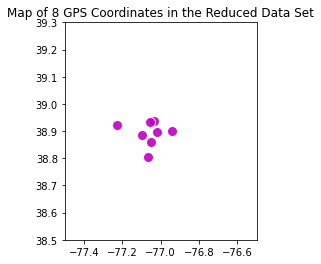

In [ ]:
# import math
fig = plt.figure()

# set the figure dimensions to the extent of the coordinates in our data
# ydimension = int((lat_range[1] - lat_range[0]) / 4)
# xdimension = int((lon_range[1] - lon_range[0]) / 4)
# fig.set_size_inches(xdimension, ydimension)
fig.set_size_inches(20, 20)
 
# plot the country boundaries and then our point data
countries.plot(colormap='binary', alpha=0)
rs_scatter = plt.scatter(x=rep_points['lon'], y=rep_points['lat'], c='m', edgecolor='white', alpha=.9, s=100)
 
# annotate the most visited cities in the data set
# for i, row in rep_points.iterrows():
#     plt.annotate(".",
#     xy=(row['lon'], row['lat']),
#     xytext=(row['lon'] + 0.5, row['lat'] - 1),
#     fontproperties=annotation_font,
#     bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.9),
#     xycoords='data')
 
# limit the coordinate space shown to the extent of our point data
lon_range = [-77.5, -76.5]
lat_range = [38.5, 39.3]

plt.xlim(lon_range)
plt.ylim(lat_range) 
 
# set axis labels and title
plt.title('Map of ' + str(len(rep_points)) + ' GPS Coordinates in the Reduced Data Set')
 
plt.show()

In [ ]:
# lon_range

In [ ]:
# lat_range

---

Testing with DC Shapefile

---

In [ ]:
# load the dc region shapefile
dc_counties = GeoDataFrame.from_file('/content/drive/My Drive/Data Links/MD_Metro_Counties/MD_Metro_Counties.shp')